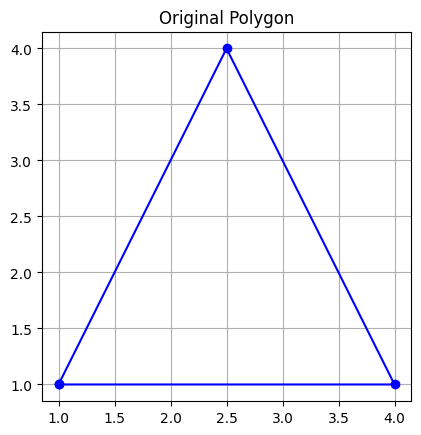

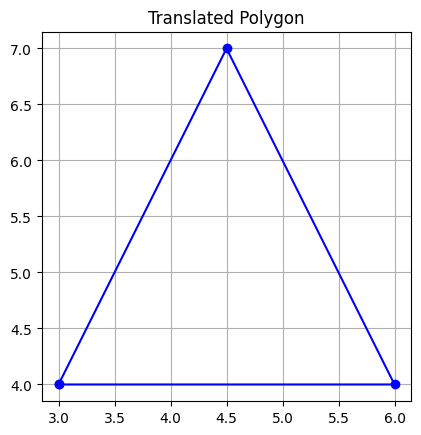

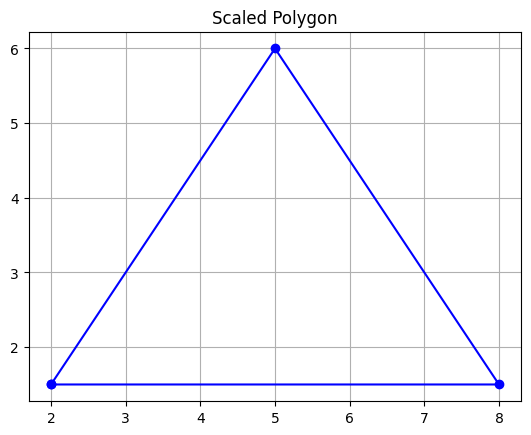

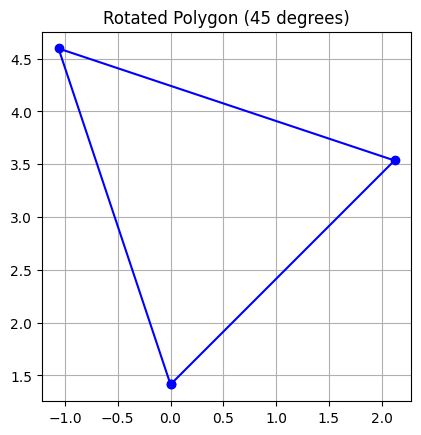

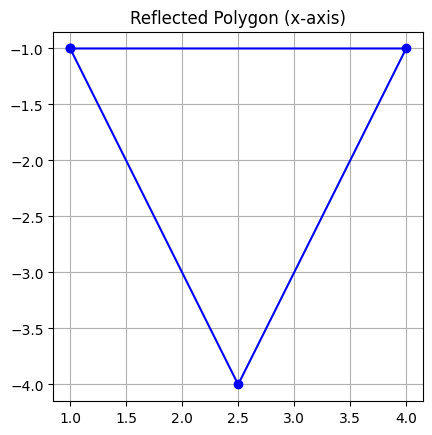

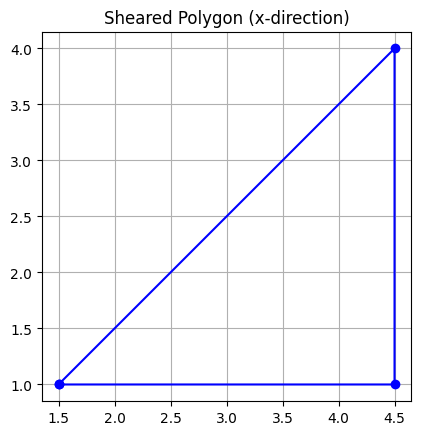

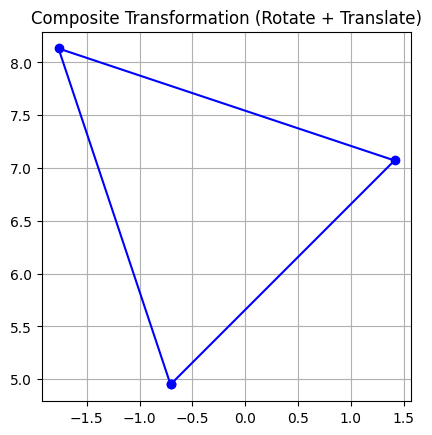

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_polygon(points, title="Polygon", color="blue"):
    """Plot a 2D polygon."""
    points = np.vstack([points, points[0]])  # Close the polygon
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.title(title)
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def translation(points, tx, ty):
    """Translate a 2D object by tx and ty."""
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0,  1]])
    return np.dot(np.c_[points, np.ones(len(points))], T.T)[:, :2]

def scaling(points, sx, sy):
    """Scale a 2D object by sx and sy."""
    S = np.array([[sx,  0, 0],
                  [0, sy, 0],
                  [0,  0, 1]])
    return np.dot(np.c_[points, np.ones(len(points))], S.T)[:, :2]

def rotation(points, angle):
    """Rotate a 2D object by an angle (in degrees)."""
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad),  np.cos(rad), 0],
                  [0,           0,          1]])
    return np.dot(np.c_[points, np.ones(len(points))], R.T)[:, :2]

def reflection(points, axis):
    """Reflect a 2D object across the x-axis, y-axis, or origin."""
    if axis == "x":
        R = np.array([[1,  0, 0],
                      [0, -1, 0],
                      [0,  0, 1]])
    elif axis == "y":
        R = np.array([[-1, 0, 0],
                      [0,  1, 0],
                      [0,  0, 1]])
    elif axis == "origin":
        R = np.array([[-1, 0, 0],
                      [0, -1, 0],
                      [0,  0, 1]])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'origin'.")
    return np.dot(np.c_[points, np.ones(len(points))], R.T)[:, :2]

def shearing(points, shx=0, shy=0):
    """Shear a 2D object along x and/or y directions."""
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0,   0, 1]])
    return np.dot(np.c_[points, np.ones(len(points))], Sh.T)[:, :2]

def composite_transformation(points, transformations):
    """Apply a sequence of transformations to a 2D object."""
    composite_matrix = np.eye(3)  # Start with an identity matrix
    for transformation in transformations:
        composite_matrix = np.dot(composite_matrix, transformation)
    return np.dot(np.c_[points, np.ones(len(points))], composite_matrix.T)[:, :2]

# Define a polygon (a triangle for demonstration)
polygon = np.array([[1, 1], [4, 1], [2.5, 4]])

# Plot original polygon
plot_polygon(polygon, title="Original Polygon")

# Perform individual transformations
translated_polygon = translation(polygon, 2, 3)
plot_polygon(translated_polygon, title="Translated Polygon")

scaled_polygon = scaling(polygon, 2, 1.5)
plot_polygon(scaled_polygon, title="Scaled Polygon")

rotated_polygon = rotation(polygon, 45)
plot_polygon(rotated_polygon, title="Rotated Polygon (45 degrees)")

reflected_polygon = reflection(polygon, "x")
plot_polygon(reflected_polygon, title="Reflected Polygon (x-axis)")

sheared_polygon = shearing(polygon, shx=0.5, shy=0)
plot_polygon(sheared_polygon, title="Sheared Polygon (x-direction)")

# Perform composite transformation: Rotate 45° + Translate (2, 3)
T_translate = np.array([[1, 0, 2],
                        [0, 1, 3],
                        [0, 0, 1]])

T_rotate = np.array([[np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],
                     [np.sin(np.radians(45)),  np.cos(np.radians(45)), 0],
                     [0,                      0,                      1]])

composite_polygon = composite_transformation(polygon, [T_rotate, T_translate])
plot_polygon(composite_polygon, title="Composite Transformation (Rotate + Translate)")

Lab1 part-2

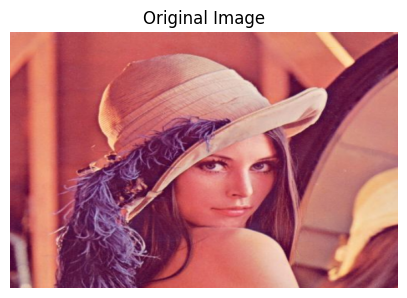

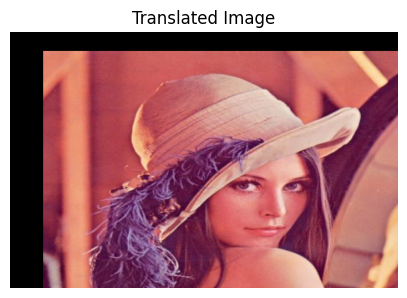

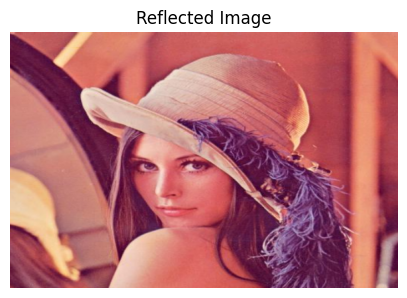

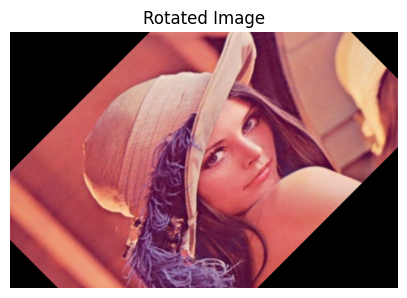

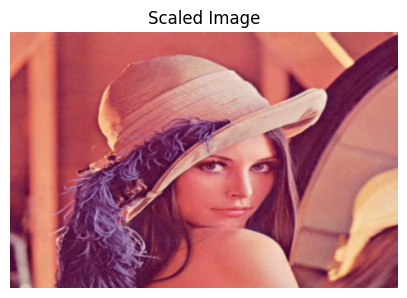

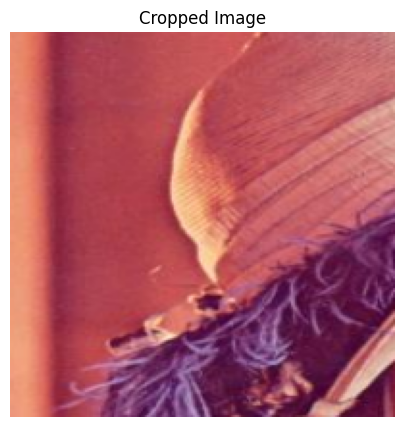

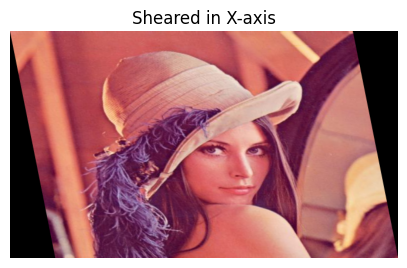

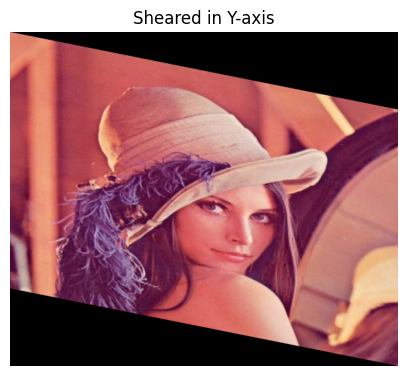

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display(title, img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an image
image_path = '/content/Screenshot 2025-01-17 093921.png'  # Replace with the path to your image
image = cv2.imread(image_path)
display("Original Image", image)

# 1. Image Translation
def translate(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, translation_matrix, (cols, rows))

translated_img = translate(image, 50, 30)
display("Translated Image", translated_img)

# 2. Reflection
def reflect(img):
    return cv2.flip(img, 1)  # Flip around the y-axis

reflected_img = reflect(image)
display("Reflected Image", reflected_img)

# 3. Rotation
def rotate(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))

rotated_img = rotate(image, 45)  # Rotate by 45 degrees
display("Rotated Image", rotated_img)

# 4. Scaling
def scale(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled_img = scale(image, 1.5, 1.5)  # Scale by 1.5x
display("Scaled Image", scaled_img)

# 5. Cropping
def crop(img, x, y, w, h):
    return img[y:y+h, x:x+w]

cropped_img = crop(image, 50, 50, 200, 200)  # Define a region
if cropped_img.size > 0:
    display("Cropped Image", cropped_img)
else:
    print("Cropping region is out of bounds.")

# 6. Shearing in x-axis
def shear_x(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols + int(shear_factor * rows), rows))

sheared_x_img = shear_x(image, 0.2)
display("Sheared in X-axis", sheared_x_img)

# 7. Shearing in y-axis
def shear_y(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols, rows + int(shear_factor * cols)))

sheared_y_img = shear_y(image, 0.2)
display("Sheared in Y-axis", sheared_y_img)